# Bank Marketing Dataset :

### Overview

> The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.<br><br>
The classification goal is to predict if the client will subscribe a term deposit (variable y).

 __Source : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#__

The data is related with direct marketing campaigns of a Portuguese banking institution.<br><br>
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,<br><br>
in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## What is a Term Deposit ?


A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate <br><br>(often better than just opening
deposit account) in which your money will be returned back at a specific maturity time.

__The classification goal is to predict if the client will subscribe (yes / no) a term deposit (variable 'y').__

### Read The Data

Header | Data Type | Definition
---|---------|---------
`Age`| int64 | Age of customer
`Job` | object | Job of customer 
`Martial` | object | Martial status of customer  
`Education` | Object |Customer education level 
`Default` | Object |  Has credit in default? 
`Housing` | object | If costumer has housing loan 
`Loan` | object | Has Personal Loan
`Balance` | int64 |Customer's individual balance
`Contact` | object | Communication type
`Month` | object |  Last contact month of year 
`Day` | int64 | Last contact day of the week
`Duration` | int64 |Last contact duration, in seconds
`Campaign` | int64 | Number of contacts performed during this campaign and for this client
`Pdays` | int64 | Number of days that passed by after the client was last contacted from a previous campaign 
`Previous` | int64 | Number of contacts performed before this campaign and for this client
`Poutcome` | object |outcome of the previous marketing campaign 
`Y` | object | has the client subscribed a term deposit 

> __Here _y_ is the target variable.__

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import sklearn
import scipy
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn import metrics

# for Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

import pickle

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# for styling
plt.style.use('seaborn-whitegrid')

ImportError: cannot import name '_joblib_parallel_args' from 'sklearn.utils.fixes' (C:\Users\harih\anaconda3\lib\site-packages\sklearn\utils\fixes.py)

In [ ]:
df = pd.read_csv('bank-full.csv')
df.head()

## EDA and Visualization

- #### Statistical Description of Data
- #### Plots
- #### Relationship between the attributes

In [5]:
# shows the statistical summary of numerical columns

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# CATEGORIGAL VALUES

cat= df.select_dtypes(include= object)
cat_columns = cat.columns

In [7]:
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [8]:
for feature in cat_columns:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2


> __Feature _job_ and _month_ has the highest number of categorical values.__

In [9]:
cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']

In [10]:
# NUMERICAL VALUES

numeric = df.select_dtypes(include=np.number)
numeric_columns= numeric.columns
numeric_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

### Outliers and IQR

In [11]:
def Outdet(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    return LR,UR

LR,UR=Outdet(df)
print("The Lower Quartile outliers are :\n",LR)
print("The Upper Quartile outliers are :\n ",UR)

The Lower Quartile outliers are :
 age           10.5
balance    -1962.0
day          -11.5
duration    -221.0
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64
The Upper Quartile outliers are :
  age           70.5
balance     3462.0
day           40.5
duration     643.0
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64


In [12]:
# IQR
Q1 = np.percentile(df['age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['age'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([29158, 29261, 29263, 29322, 29865, 30225, 30264, 30908, 31051,
       31052, 31055, 31057, 31069, 31077, 31089, 31099, 31101, 31108,
       31116, 31125, 31130, 31145, 31149, 31151, 31183, 31189, 31233,
       31255, 31261, 31285, 31341, 31365, 31383, 31393, 31395, 31414,
       31447, 31527, 31569, 31647, 31723, 31816, 32009, 32032, 32064,
       32068, 32074, 32089, 32105, 32160, 32204, 32321, 32451, 32689,
       32699, 32802, 33017, 33360, 33414, 33455, 33699, 33706, 33710,
       33719, 33729, 33751, 33752, 33766, 33775, 33777, 33780, 33803,
       33810, 33811, 33815, 33827, 33846, 33860, 34128, 40363, 40367,
       40368, 40374, 40381, 40383, 40389, 40401, 40402, 40412, 40471,
       40481, 40515, 40524, 40526, 40538, 40561, 40569, 40571, 40584,
       40586, 40595, 40621, 40645, 40655, 40657, 40674, 40676, 40688,
       40699, 40702, 40710, 40712, 40726, 40732, 40759, 40766, 40786,
       40789, 40792, 40816, 40837, 40838, 40843, 40

In [13]:
# IQR
Q1 = np.percentile(df['balance'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['balance'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['balance'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['balance'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([   34,    65,    69, ..., 45185, 45191, 45208], dtype=int64),) (array([ 1896,  7413,  7756, 11655, 12909, 13687, 13708, 14434, 15682,
       17159, 18573, 20317, 25119, 25240, 31509, 32713, 38736],
      dtype=int64),)


In [14]:
# IQR
Q1 = np.percentile(df['day'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['day'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['day'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['day'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([], dtype=int64),) (array([], dtype=int64),)


In [15]:
# IQR
Q1 = np.percentile(df['duration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['duration'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['duration'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([   37,    43,    53, ..., 45200, 45206, 45208], dtype=int64),) (array([], dtype=int64),)


In [16]:
# IQR
Q1 = np.percentile(df['campaign'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['campaign'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['campaign'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['campaign'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([  706,   758,   780, ..., 44891, 45015, 45056], dtype=int64),) (array([], dtype=int64),)


In [17]:
# IQR
Q1 = np.percentile(df['pdays'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['pdays'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['pdays'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['pdays'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([    0,     1,     2, ..., 45208, 45209, 45210], dtype=int64),) (array([    0,     1,     2, ..., 45206, 45207, 45209], dtype=int64),)


In [18]:
# IQR
Q1 = np.percentile(df['previous'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['previous'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['previous'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['previous'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([    0,     1,     2, ..., 45208, 45209, 45210], dtype=int64),) (array([    0,     1,     2, ..., 45206, 45207, 45209], dtype=int64),)


In [5]:
num_features=['age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous']

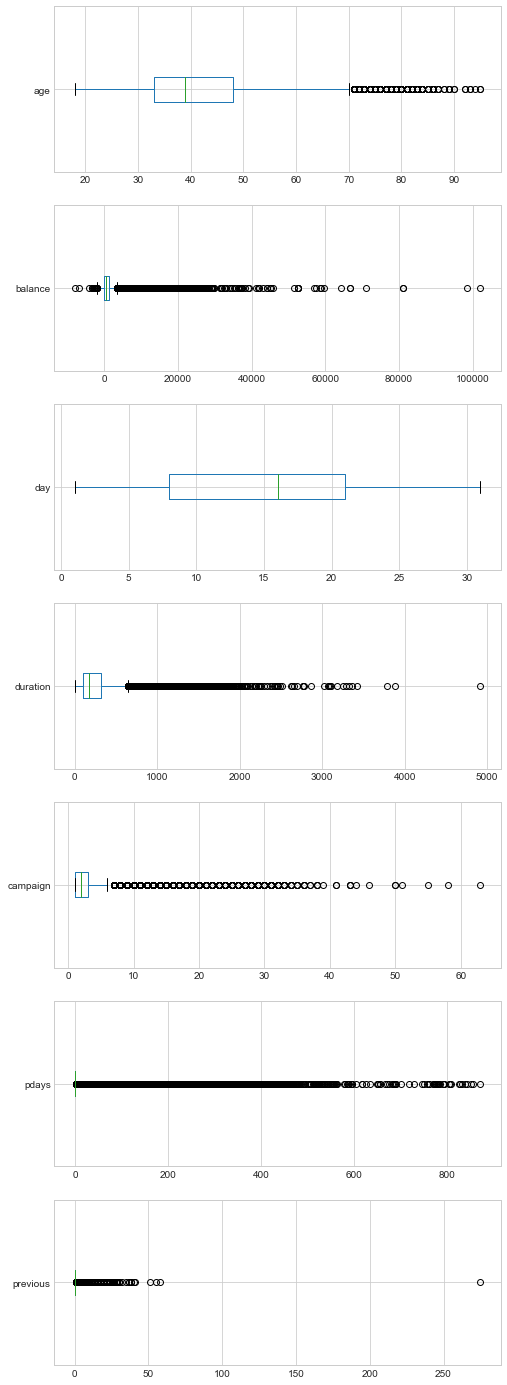

In [20]:
# Boxplot for each numerical feature

fig, axes = plt.subplots(7, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df[[c]].boxplot(ax=axes[i], vert=False) 

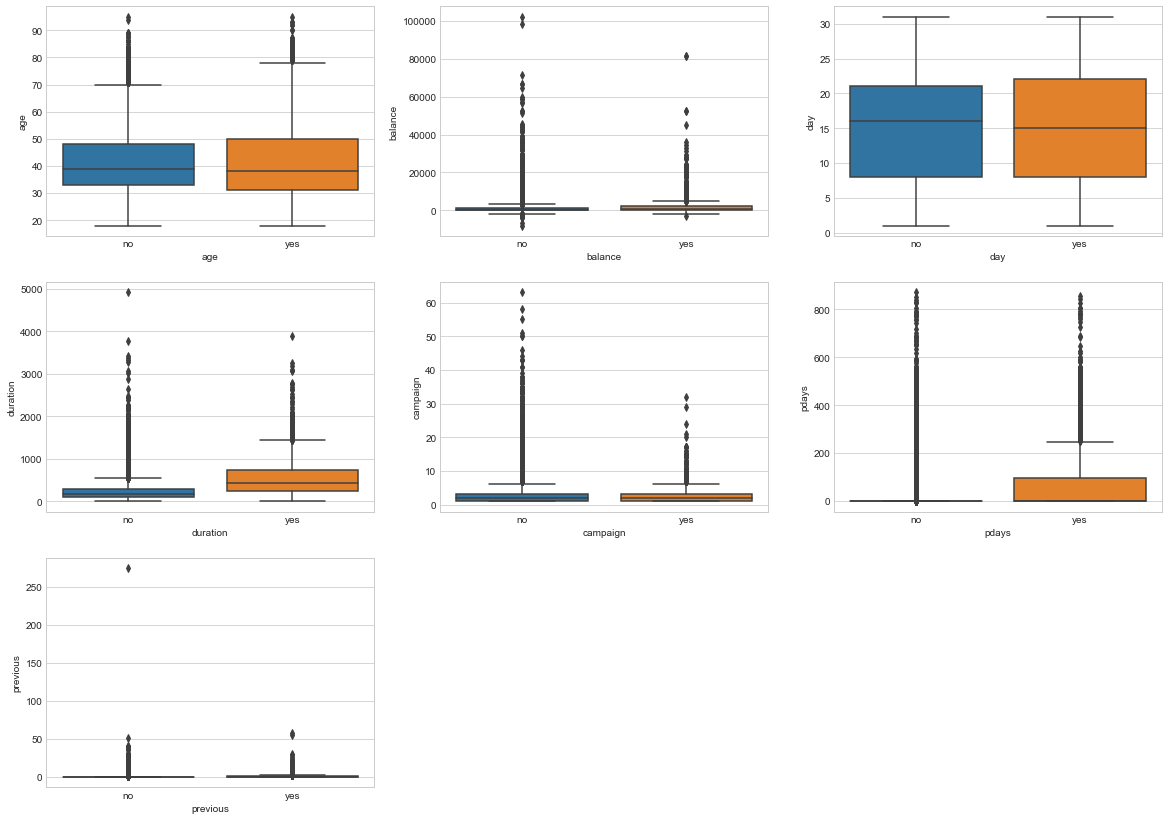

In [21]:
# boxplot to show target distribution with respect numerical features

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

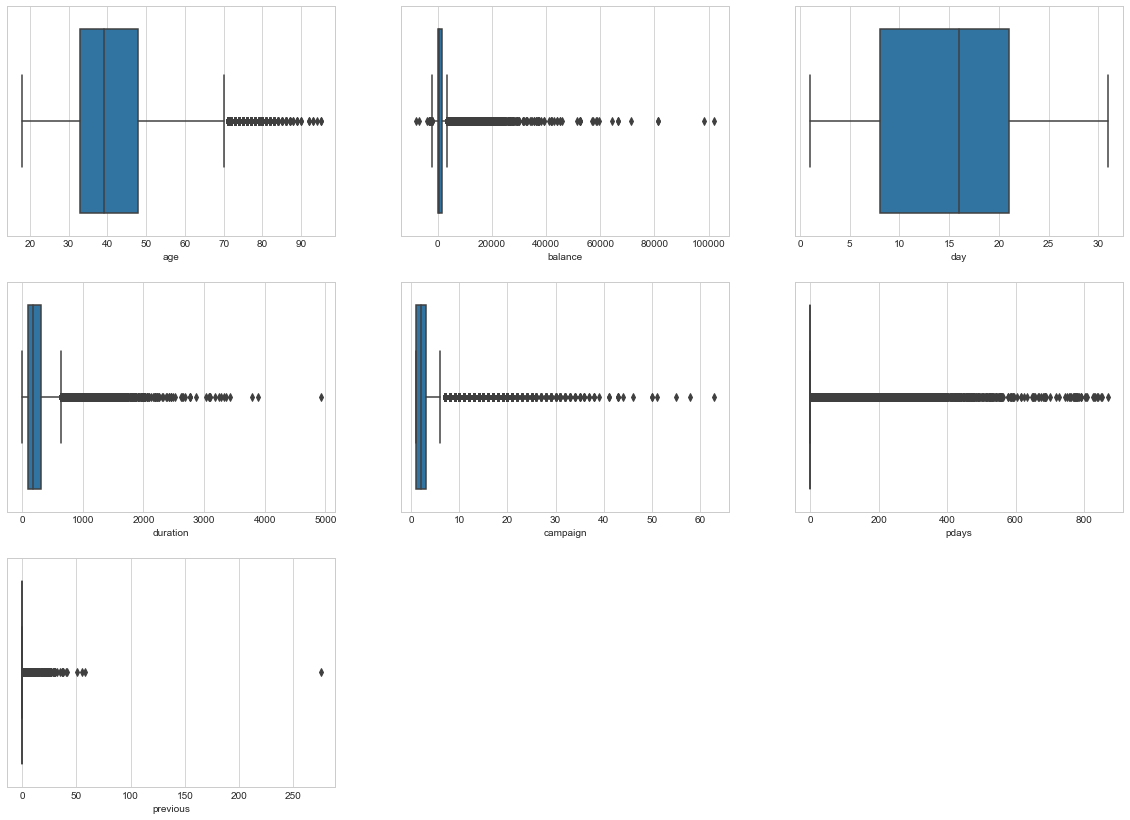

In [22]:
# boxplot on numerical features to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

In [23]:
num_features=['age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous']

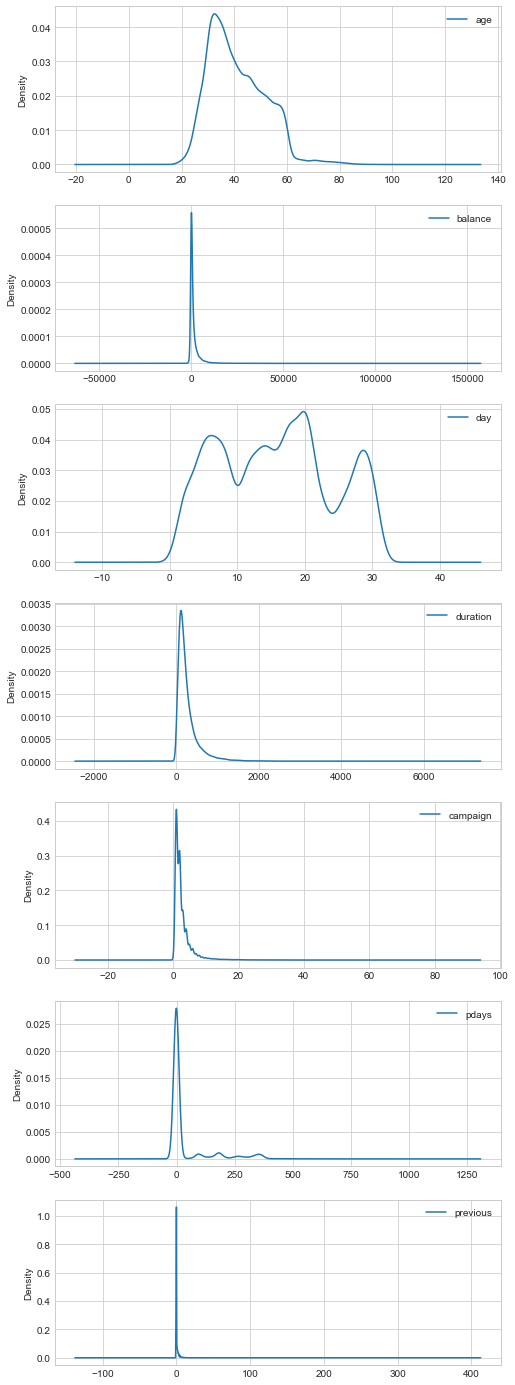

In [24]:
# Kernel Density Estimation plot for each numerical feature

fig, axes = plt.subplots(7, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df[[c]].plot(kind='kde',ax=axes[i])

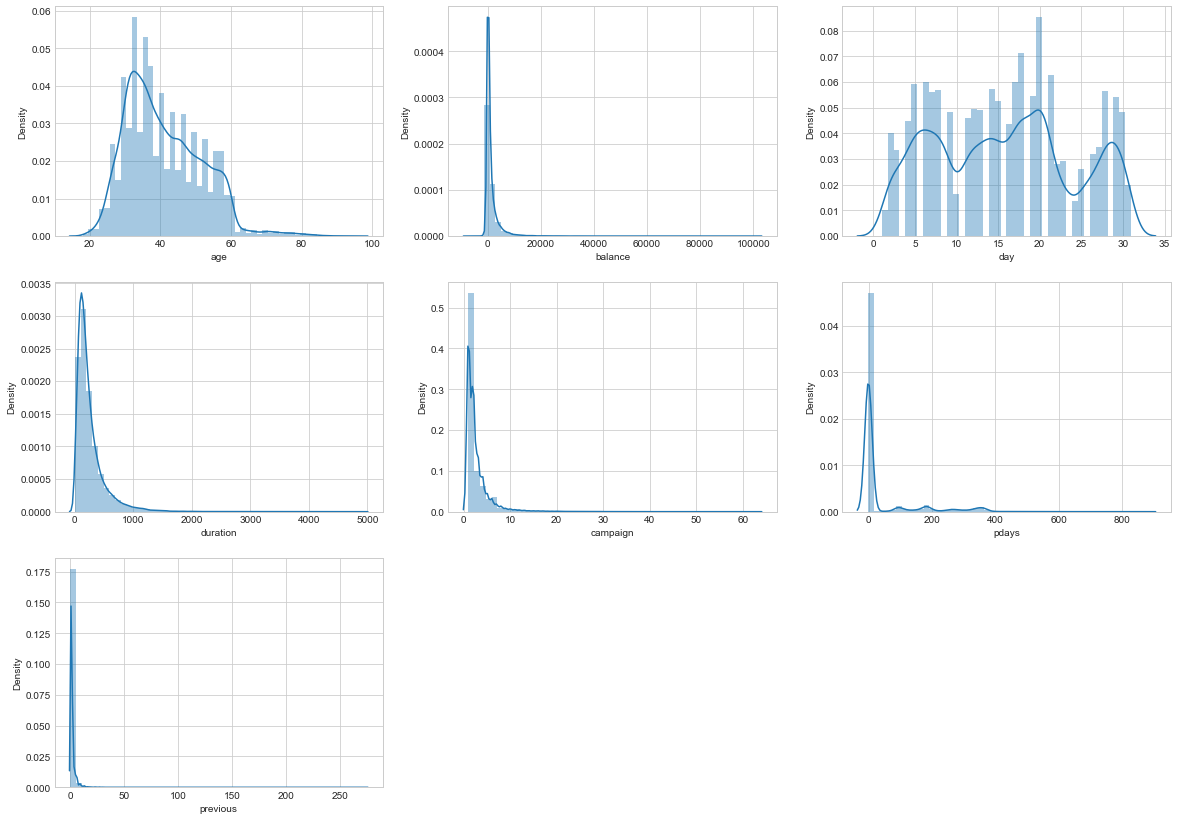

In [25]:
# Distribution of Continous Numerical Features
# plot a univariate distribution of continues observations

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

In [26]:
cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']

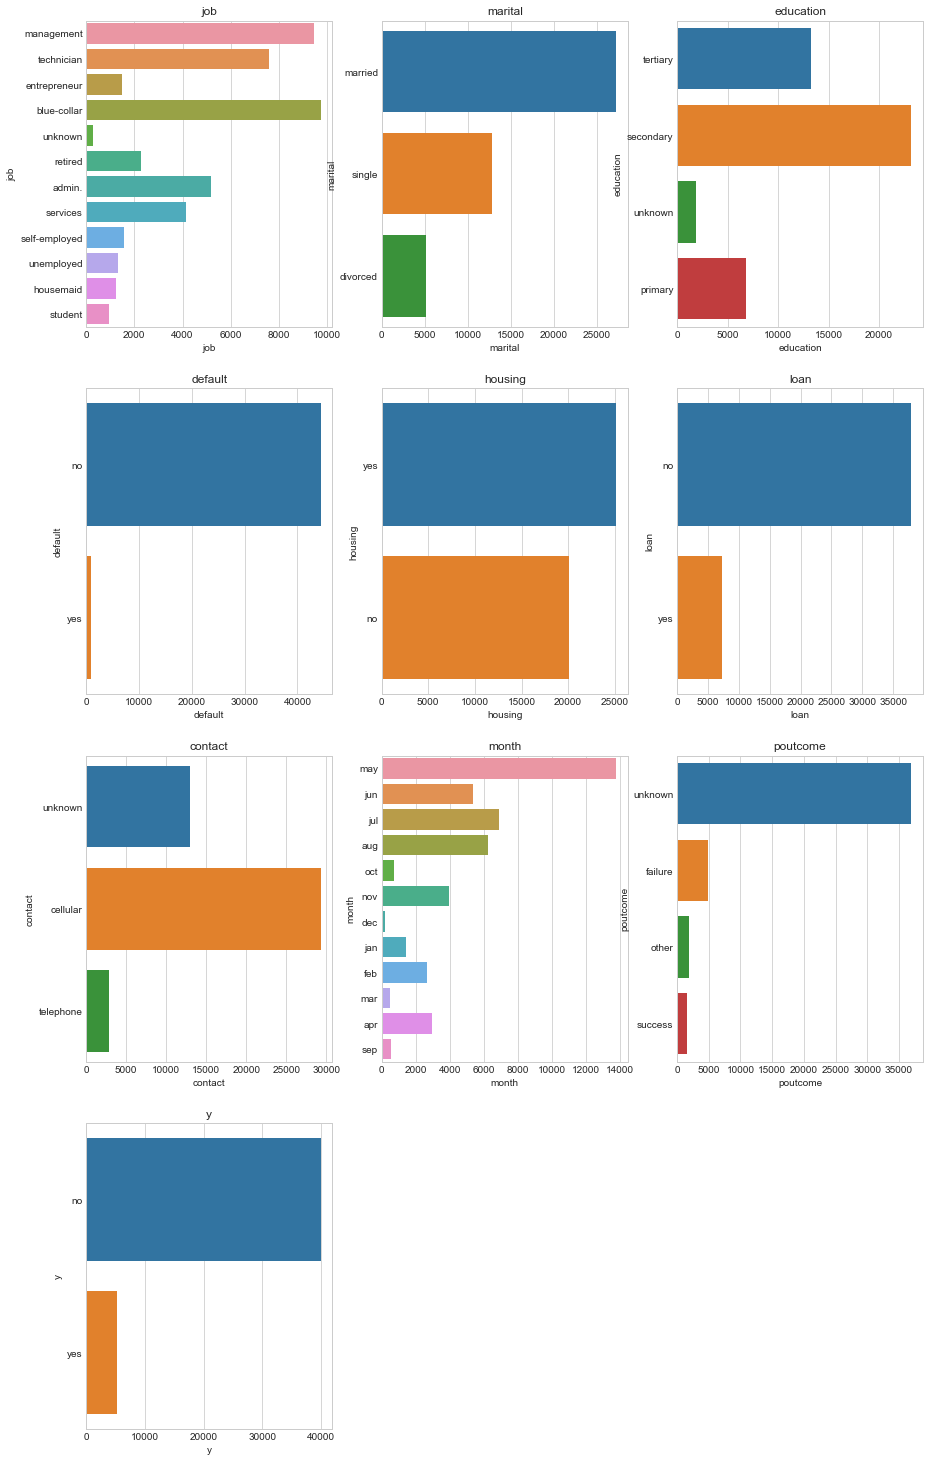

In [27]:
# check count based on categorical features

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cat_features in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_features,data=df)
    plt.xlabel(cat_features)
    plt.title(cat_features)
    plotnumber+=1
plt.show()

In [28]:
cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']

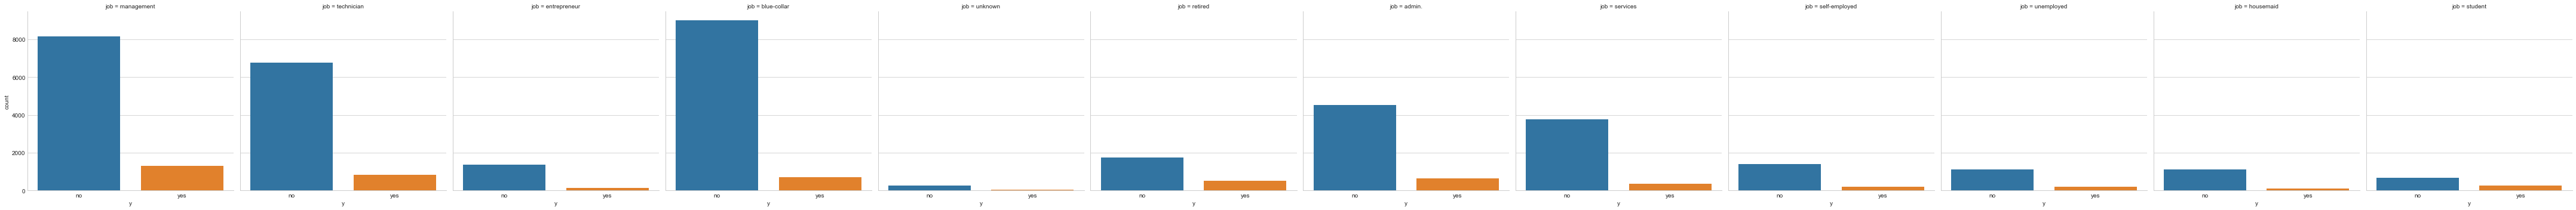

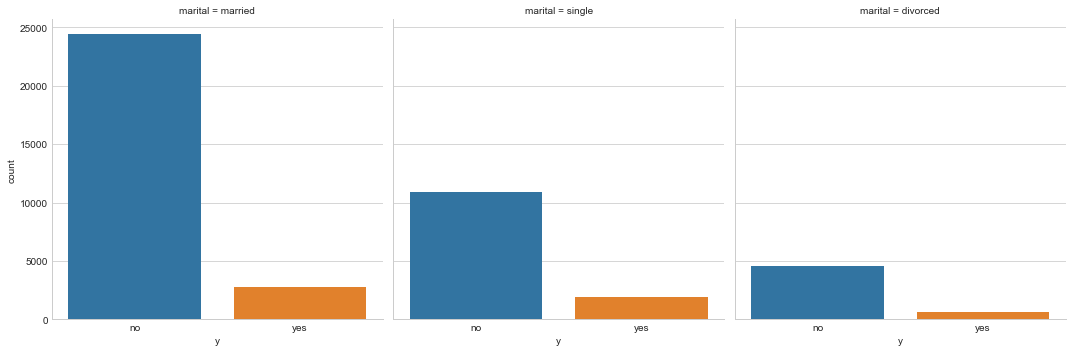

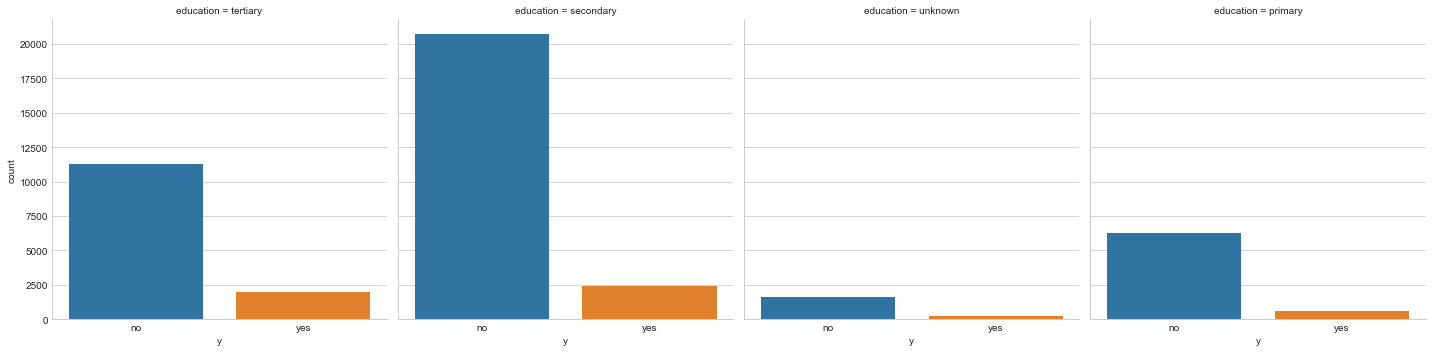

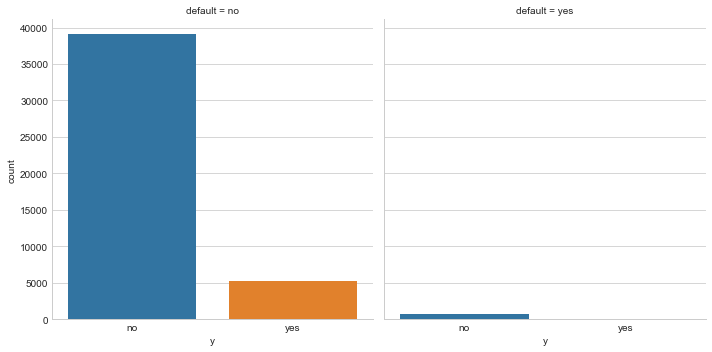

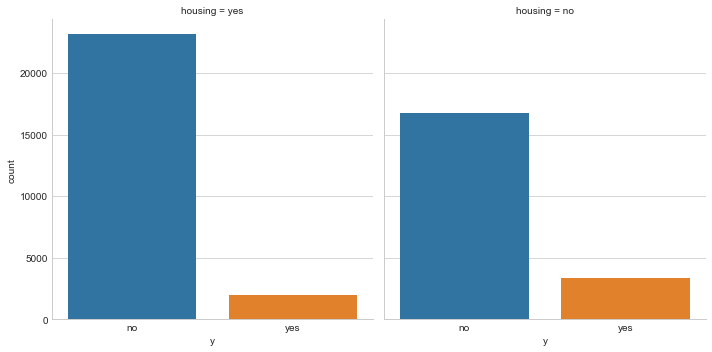

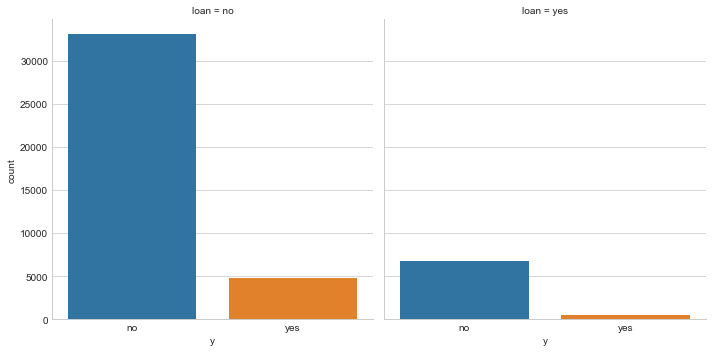

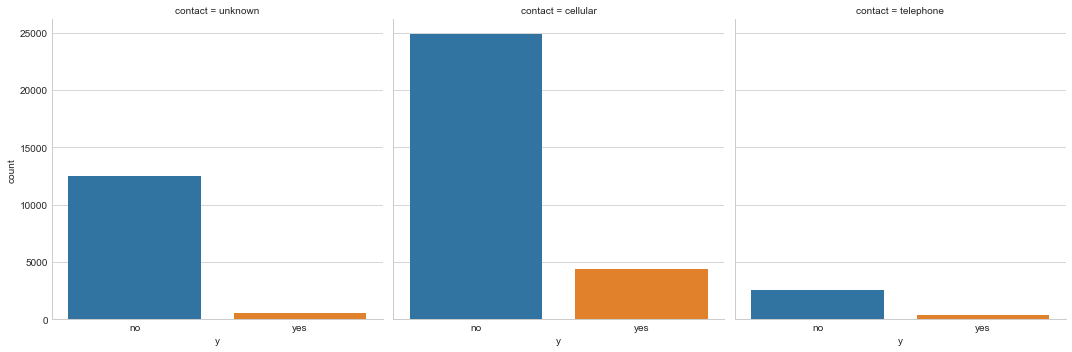

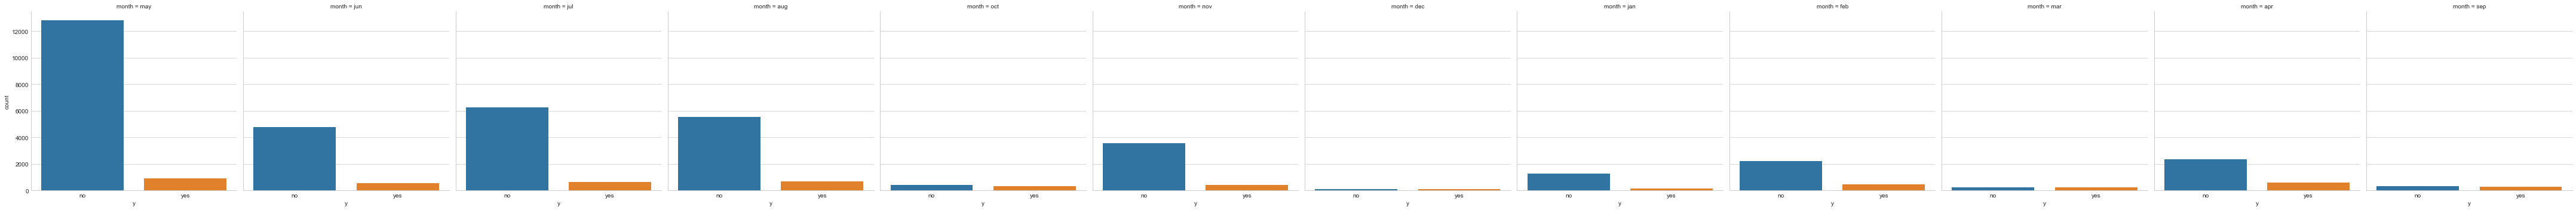

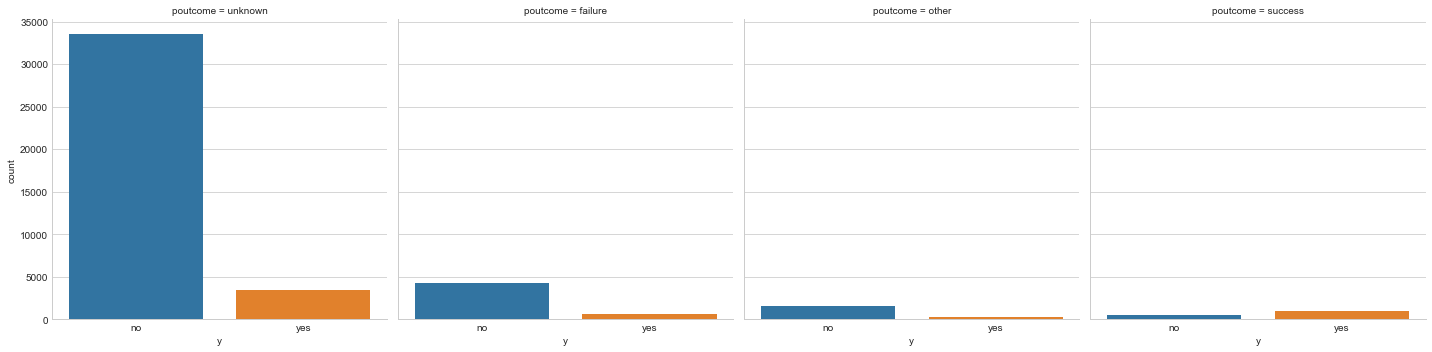

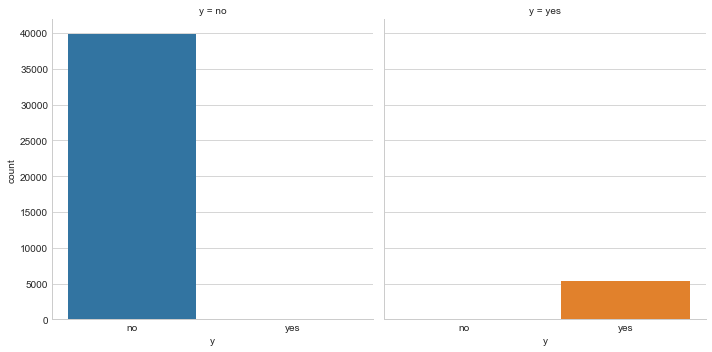

In [29]:
# check target label split over categorical features
# Finding out the relationship between categorical variable and dependent variable

for cat_features in cat_features:
    sns.catplot(x='y', col=cat_features, kind='count', data= df)
plt.show()

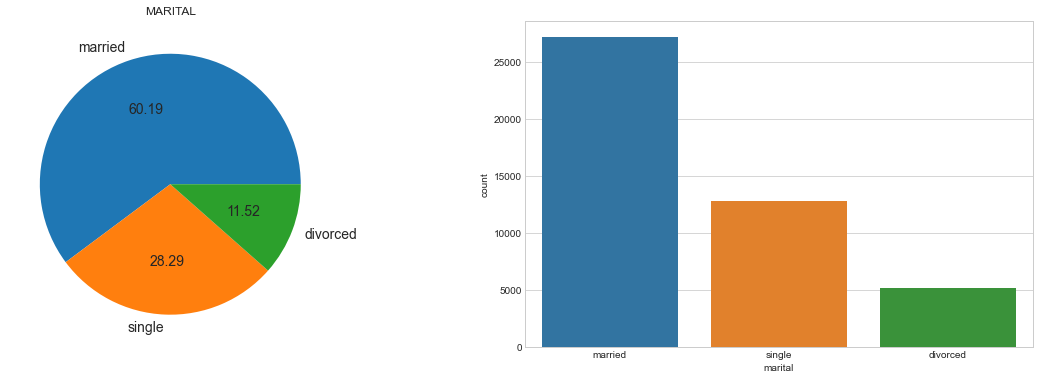

In [30]:
# Categorical feature(s)
#name : marital
#labels : 0 , 1 , 2 ('married', 'single', 'divorced')

# Pie and count plot for Categorical feature

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
data = df['marital'].value_counts()
barplot = data.plot(kind='pie', ax=axes[0], title='MARITAL', autopct="%.2f", fontsize=14, ylabel='')
countplot = sns.countplot(x='marital', data=df, ax=axes[1])

In [31]:
!pip install seaborn_qqplot

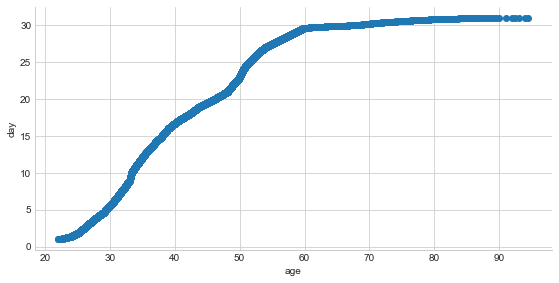

In [32]:
import seaborn as sns
from seaborn_qqplot import pplot
pplot(df,x="age",y="day",kind="qq",height=4,aspect=2)

__It's not normal , having the attribute age.__ 

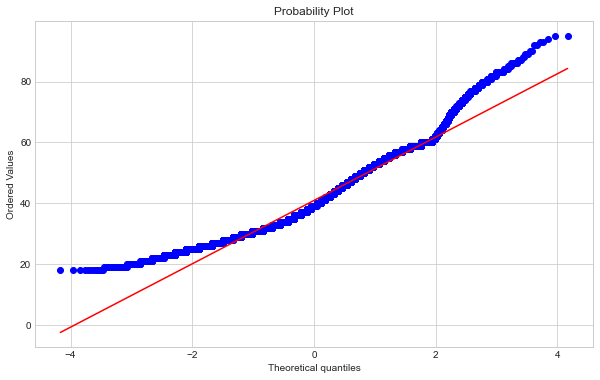

In [19]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(df["age"], dist="norm", plot=plt)
plt.show()

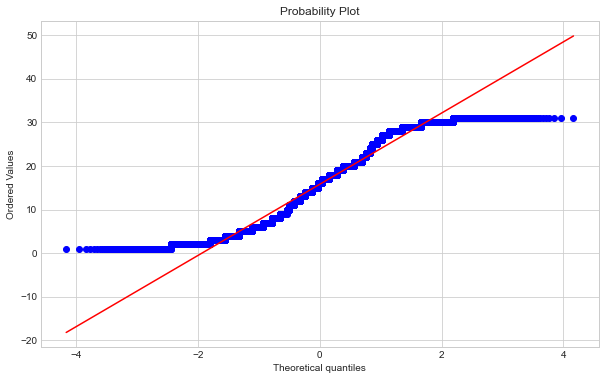

In [12]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(df["day"], dist="norm", plot=plt)
plt.show()

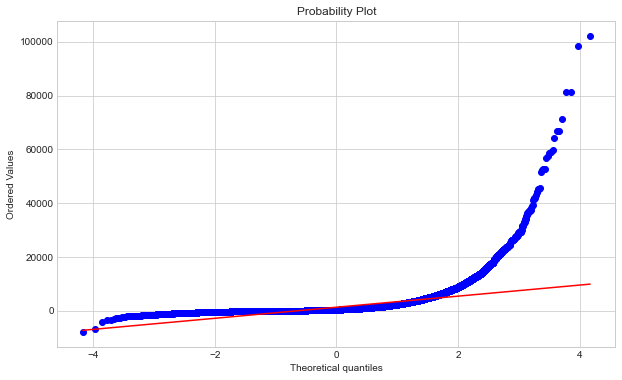

In [13]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(df["balance"], dist="norm", plot=plt)
plt.show()

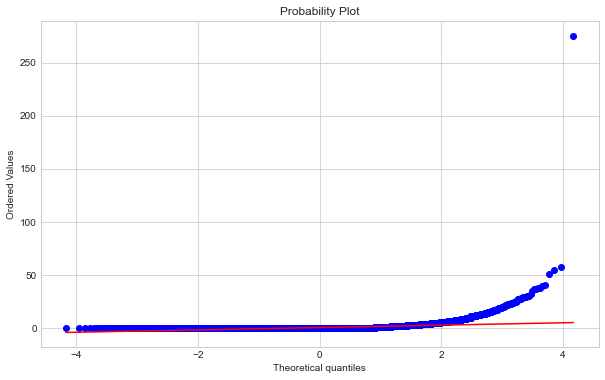

In [14]:
plt.rcParams["figure.figsize"] = (10,6)
stats.probplot(df['previous'], dist ="norm", plot = plt)
plt.show()

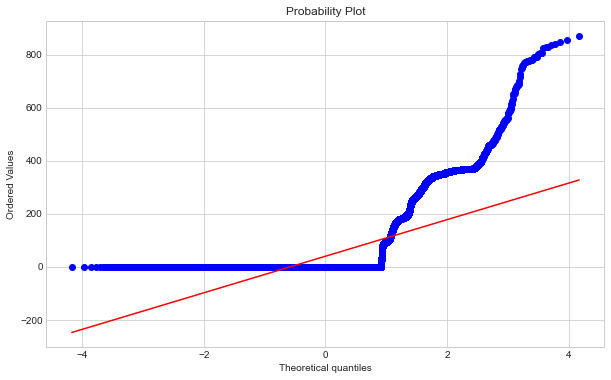

In [16]:
plt.rcParams["figure.figsize"] = (10,6)
stats.probplot(df['pdays'], dist ="norm", plot = plt)
plt.show()

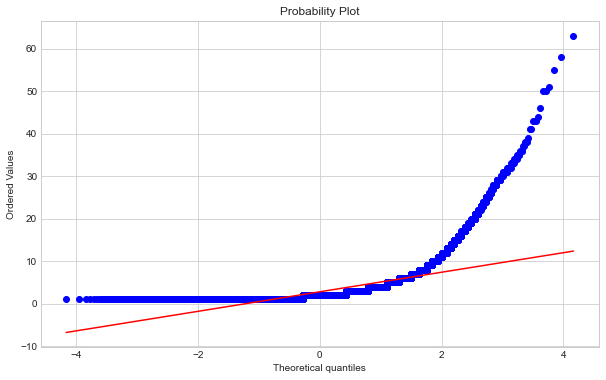

In [17]:
plt.rcParams["figure.figsize"] = (10,6)
stats.probplot(df['campaign'], dist ="norm", plot = plt)
plt.show()

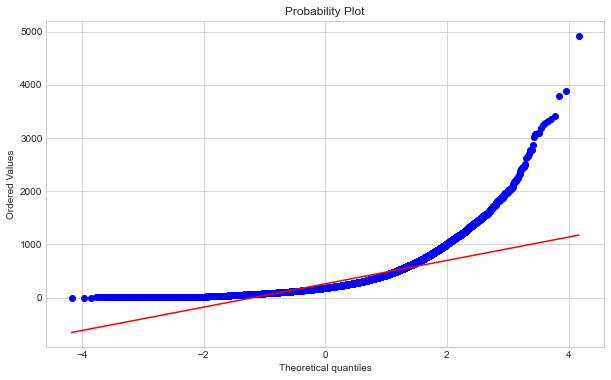

In [18]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(df["duration"], dist="norm", plot=plt)
plt.show()

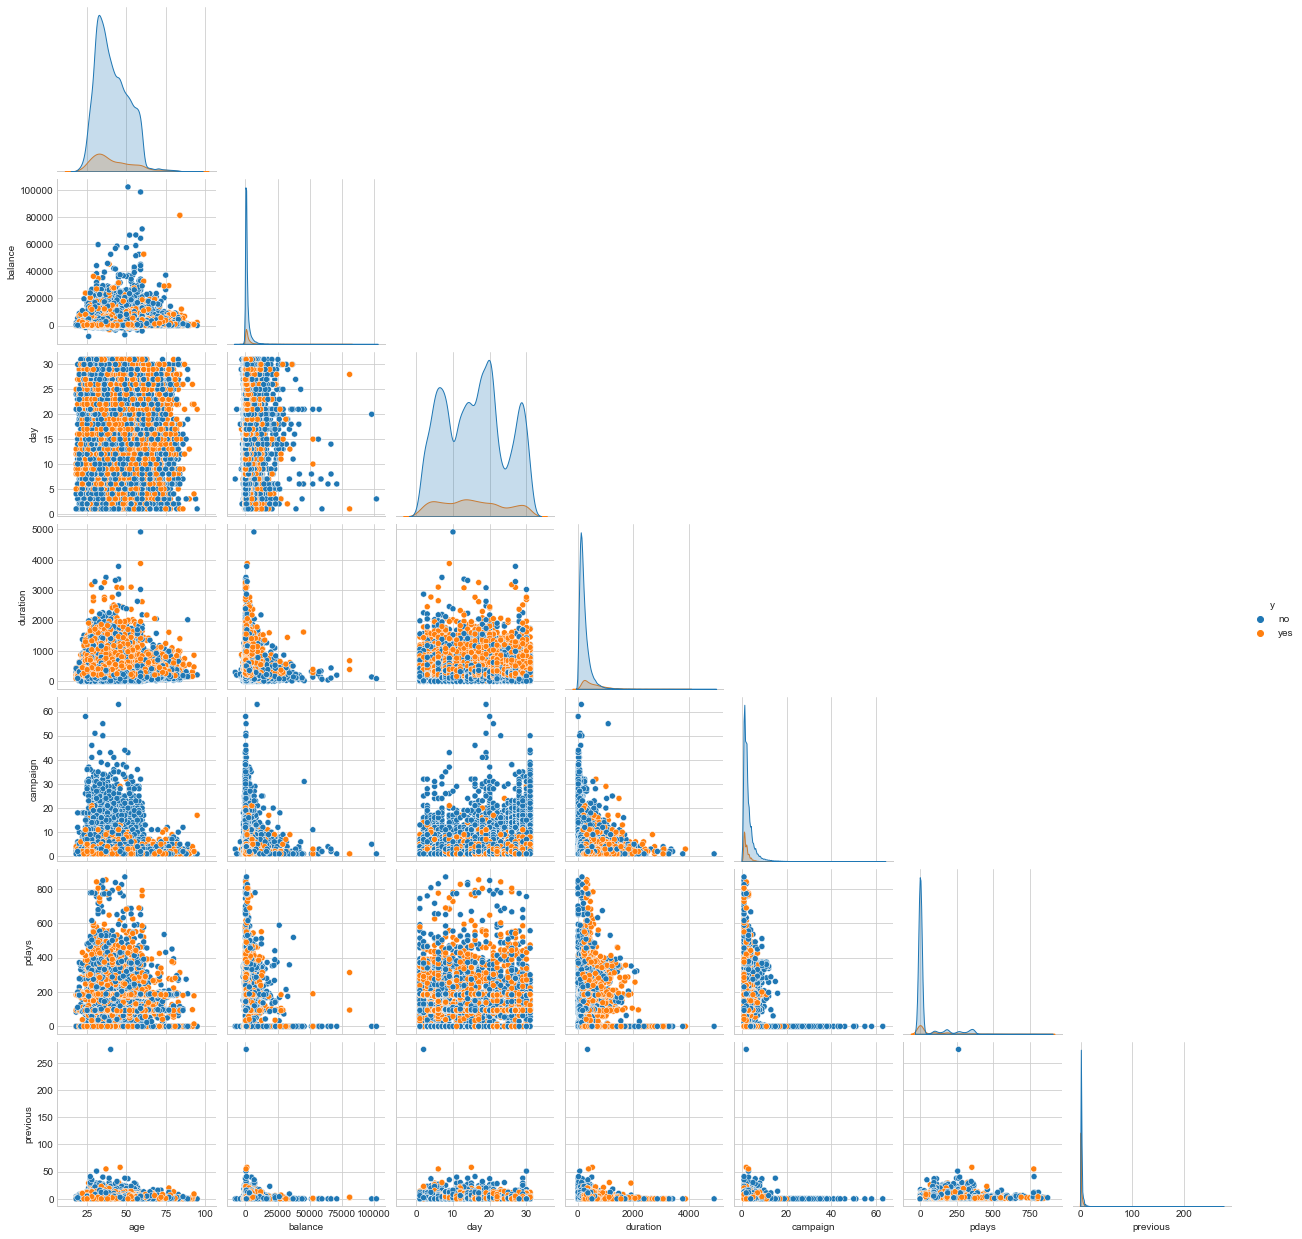

In [33]:
# PAIRPLOT for scatterness and correlation

sns.pairplot(df,hue='y',corner=True)

In [34]:
# Check target label split over categorical features and find the count

df.y.value_counts().to_frame(name='Count')

,Count
no,39922
yes,5289


In [35]:
# Percentage of the count of target label

round(df['y'].value_counts()/len(df)*100,2)

no     88.3
yes    11.7
Name: y, dtype: float64

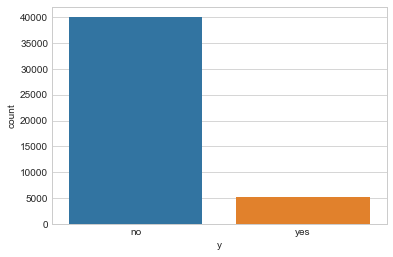

In [36]:
# Count of the Target label

sns.countplot(x='y',data=df)
plt.show()

In [37]:
print("Total number of poeple who opened term deposit: {0}".format(len(df.y[df.y=='yes'])))
print("Total number of poeple who haven't opened term deposit: {0}".format(len(df.y[df.y=='no'])))

Total number of poeple who opened term deposit: 5289
Total number of poeple who haven't opened term deposit: 39922


- __From the Counts of target label , we say that the dataset is _highly imbalanced_ as it contains only 11.7% of term deposits__ 

__have made by the customers.__

## Data Pre-processing

- #### Remove null values and duplicates
- #### Data Cleaning
- #### Normalization
- #### Encoding
- #### Feature Selection
- #### Correlation Analysis ( Heat Map )

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:
# find number of rows and column

df.shape

(45211, 17)

In [40]:
# find unique values in each object datatype 

for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [41]:
# displays unique values in each columns

for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


> __No feature with only one value.__

In [42]:
# find missing values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [43]:
# % of null values

df.isna().sum()/len(df)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [44]:
# dropping null values

df.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


> __We do not have any missing values.__

In [26]:
# check for duplicate values 

df1=df.duplicated()
df[~df1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [46]:
df.duplicated().sum()

0

> __There are no dupicates in the dataset.__

In [47]:
# Correlation between numerical features

df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [48]:
corr_matt=df.corr()
corr_matt

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

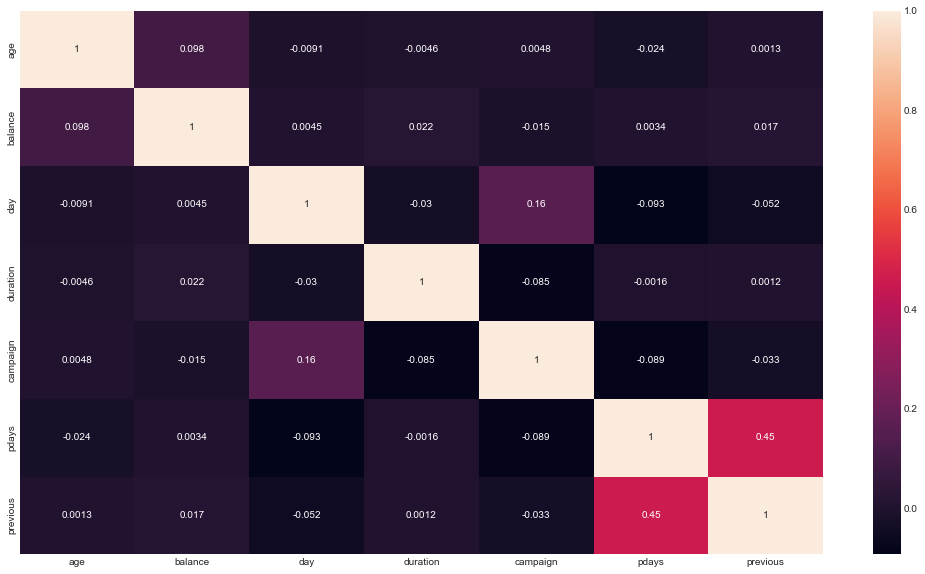

In [49]:
# Checking for correlation (Pearson's)

fig = plt.figure(figsize=(18,10))
sns.heatmap(corr_matt,annot=True)

> __There is no _high_ _correlation_ , hence we don't want to remove any attributes from the data .__

### Encoding

__Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.__



> __Ordinal Encoding__ : ```LABEL ENCODING```

> __Nominal Encoding__ : ```ONE HOT ENCODING```



__where , ```  Nominal  ``` : the data can only be categorized. ```  Ordinal  ``` : the data can be categorized and ranked.__

 ### __Label Encoding for Categorical attributes__

In [22]:
label_encoding = {
    "y":{"no":0,"yes":1},
    "poutcome":{"unknown":0,"failure":1,"other":2,"success":3},
    "month":{"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},
    "contact":{"unknown":0,"cellular":1,"telephone":2},
    "loan":{"no":0,"yes":1},
    "housing":{"no":0,"yes":1},
    "default":{"no":0,"yes":1},
    "education":{"tertiary":0,"secondary":1,"unknown":2,"primary":3},
    "marital":{"married":0,"single":1,"divorced":2},   
    "job":{"management":0,"technician":1,"entrepreneur":2,"blue-collar":3,"unknown":4,"retired":5,"admin.":6,"services":7,"self-employed":8,"unemployed":9,"housemaid":10,"student":11}
}

In [23]:
df1 = df.replace(label_encoding)

In [29]:
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,1,0,0,5,4,261,1,-1,0,0,0
1,44,1,1,1,0,29,1,0,0,5,4,151,1,-1,0,0,0
2,33,2,0,1,0,2,1,1,0,5,4,76,1,-1,0,0,0
3,47,3,0,2,0,1506,1,0,0,5,4,92,1,-1,0,0,0
4,33,4,1,2,0,1,0,0,0,5,4,198,1,-1,0,0,0
5,35,0,0,0,0,231,1,0,0,5,4,139,1,-1,0,0,0
6,28,0,1,0,0,447,1,1,0,5,4,217,1,-1,0,0,0
7,42,2,2,0,1,2,1,0,0,5,4,380,1,-1,0,0,0
8,58,5,0,3,0,121,1,0,0,5,4,50,1,-1,0,0,0
9,43,1,1,1,0,593,1,0,0,5,4,55,1,-1,0,0,0


In [53]:
# Pearson's Correlation of features w.r.t target label

corr_matt1=df1.corr()['y']
corr_matt1

age          0.025155
job          0.022396
marital      0.043846
education   -0.058675
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact      0.130590
day         -0.028348
month        0.018717
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome     0.259315
y            1.000000
Name: y, dtype: float64

### __MinMax Scaling for Numerical attributes__

__Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature__ 

__gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal__ 

__between 0 and 1.__

In [30]:
num_features=['age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous']

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))

df1[num_features] = scaler.fit_transform(df1[num_features]) 

In [25]:
df2 = df1[num_features]
df2

,age,balance,day,duration,campaign,pdays,previous
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000


In [26]:
#SPLITTING THE DATA

# get all the features
features = [feat for feat in df1.columns if feat !='y']

x = df2[num_features] # feature set
y = df1['y'] # target

# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# train and test datasets dimensions
x_train.shape, x_test.shape

((36168, 7), (9043, 7))

In [69]:
x_train[num_features]

,age,balance,day,duration,campaign,pdays,previous
24001,0.233766,0.080620,0.933333,0.028467,0.016129,0.000000,0.000000
43409,0.077922,0.110263,0.133333,0.184425,0.048387,0.213303,0.025455
20669,0.337662,0.075019,0.366667,0.352786,0.048387,0.000000,0.000000
18810,0.389610,0.072803,1.000000,0.007117,0.161290,0.000000,0.000000
23130,0.259740,0.075137,0.833333,0.011590,0.145161,0.000000,0.000000
...,...,...,...,...,...,...,...
17958,0.415584,0.081129,0.966667,0.011793,0.016129,0.000000,0.000000
15941,0.233766,0.073003,0.700000,0.015657,0.064516,0.000000,0.000000
16952,0.350649,0.073521,0.800000,0.019927,0.000000,0.000000,0.000000
34781,0.116883,0.096036,0.166667,0.046157,0.000000,0.000000,0.000000


In [11]:
x_test[num_features]

,age,balance,day,duration,campaign,pdays,previous
32936,0.207792,0.077806,0.533333,0.023383,0.016129,0.362385,0.040000
1643,0.142857,0.072803,0.266667,0.043717,0.000000,0.000000,0.000000
8565,0.168831,0.072803,0.066667,0.006303,0.064516,0.000000,0.000000
7144,0.324675,0.119759,0.933333,0.011590,0.032258,0.000000,0.000000
32575,0.467532,0.071596,0.533333,0.015453,0.000000,0.394495,0.007273
...,...,...,...,...,...,...,...
35507,0.168831,0.080057,0.200000,0.113054,0.032258,0.000000,0.000000
2186,0.116883,0.073875,0.366667,0.010777,0.000000,0.000000,0.000000
41085,0.363636,0.075854,0.433333,0.052867,0.032258,0.525229,0.003636
4735,0.168831,0.080947,0.633333,0.005287,0.016129,0.000000,0.000000


## Oversampling

__Over sampling is used when the amount of data collected is insufficient.__

 __When one class of data is the underrepresented minority class in the data sample, over sampling techniques maybe used to__



 __duplicate these results for a more balanced amount of positive results in training.__

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.7,random_state=42)
smote=SMOTE()
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)
print("The number of Classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_os)))

The number of Classes before fit Counter({0: 27956, 1: 3691})
The number of Classes after fit Counter({0: 27956, 1: 27956})


In [36]:
x_train

,age,balance,day,duration,campaign,pdays,previous
24951,0.519481,0.082073,0.566667,0.041684,0.000000,0.000000,0.000000
22129,0.480519,0.074583,0.666667,0.034160,0.016129,0.000000,0.000000
986,0.415584,0.074247,0.200000,0.043920,0.016129,0.000000,0.000000
14999,0.324675,0.089872,0.533333,0.012810,0.080645,0.000000,0.000000
4027,0.454545,0.078677,0.500000,0.104107,0.080645,0.000000,0.000000
...,...,...,...,...,...,...,...
30403,0.220779,0.081837,0.133333,0.007930,0.000000,0.000000,0.000000
21243,0.220779,0.079613,0.566667,0.047377,0.177419,0.000000,0.000000
42613,0.220779,0.075736,0.333333,0.053070,0.016129,0.000000,0.000000
43567,0.675325,0.078396,0.866667,0.030297,0.016129,0.209862,0.003636


In [72]:
y_train

10747    0
26054    0
9125     0
41659    0
4443     0
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: y, Length: 31647, dtype: int64

In [73]:
y_train_os.value_counts()

0    27956
1    27956
Name: y, dtype: int64

In [74]:
print('not_deposited :'  , y_train_os.value_counts()[0]/len(y_train_os)*100,'%')
print('deposited: ' , y_train_os.value_counts()[1]/len(y_train_os)*100,'%')

not_deposited : 50.0 %
deposited:  50.0 %


> __Undersampling is not used here because it leads to loss of data.__

## Cross-Validation

__Cross-validation is a statistical method used to estimate the performance of machine learning models.__

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold = StratifiedKFold(n_splits=5)
model = DecisionTreeClassifier(random_state=40)
scores=cross_val_score(model,x_train_os,y_train_os,cv=skfold)
print(np.mean(scores))

0.8775408792822832


In [41]:
scores

array([0.7955643 , 0.90251319, 0.89195957, 0.89634201, 0.90519632])

## Model Building

### __Hyper parameter tuning__

In [67]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm,datasets
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

model_params = {
    'GaussianNB': {
        'model': GaussianNB(priors= None, var_smoothing = 1e-09), 
        'params': {
            
            } 
    },
    'random_forest' : {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train_os, y_train_os)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
dff = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dff
'''

"\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn import svm,datasets\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.ensemble import RandomForestClassifier\n\nmodel_params = {\n    'GaussianNB': {\n        'model': GaussianNB(priors= None, var_smoothing = 1e-09), \n        'params': {\n            \n            } \n    },\n    'random_forest' : {\n        'model': RandomForestClassifier(),\n        'params' : {\n            'n_estimators': [1,5,10]\n        }\n    },\n    'logistic_regression' : {\n        'model': LogisticRegression(solver='liblinear',multi_class='auto'),\n        'params': {\n            'C': [1,5,10]\n        }\n    }\n}\n\nscores = []\n\nfor model_name, mp in model_params.items():\n    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)\n    clf.fit(x_train_os, y_train_os)\n    scores.append({\n        'mode

- ### DescisionTree Classifier

```A decision tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered. The model is a form of supervised learning, meaning that the model is trained and tested on a set of data that contains the desired categorization.```

In [50]:
from sklearn.tree import DecisionTreeClassifier
deseciontree_model=DecisionTreeClassifier(max_depth = 10, random_state = 40)
deseciontree_model.fit(x_train_os, y_train_os)
y_predicted_deseciontree = deseciontree_model.predict(x_test)
y_predicted_deseciontree

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [51]:
deseciontree_model.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_deseciontree))
print("Precision:",metrics.precision_score(y_test,y_predicted_deseciontree))
print("Recall:",metrics.recall_score(y_test, y_predicted_deseciontree))

Accuracy: 0.8460631082276615
Precision: 0.3959218351741716
Recall: 0.5832290362953693


In [52]:
cm=confusion_matrix(y_test,y_predicted_deseciontree)
cm

array([[10544,  1422],
       [  666,   932]], dtype=int64)

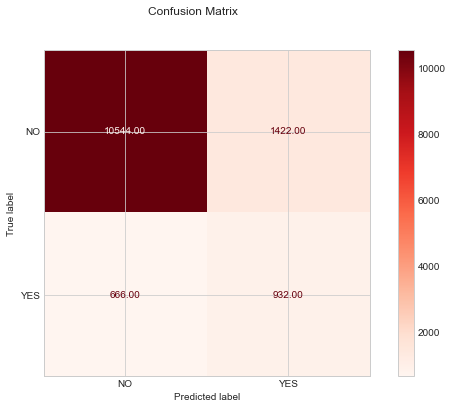

In [53]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(deseciontree_model, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

- ### Logistic Regression

```Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.```

In [54]:
from sklearn.linear_model import LogisticRegression
modelreg=LogisticRegression(C=10, random_state = 40)
modelreg.fit(x_train_os,y_train_os)
ypred=modelreg.predict(x_test)
ypred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [55]:
modelreg.score(x_test,y_test)
x_test.shape
y_test.shape

(13564,)

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Precision:",metrics.precision_score(y_test, ypred))
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 0.7865673842524329
Precision: 0.3133812949640288
Recall: 0.681476846057572


In [57]:
cm=confusion_matrix(y_test,ypred)
cm

array([[9580, 2386],
       [ 509, 1089]], dtype=int64)

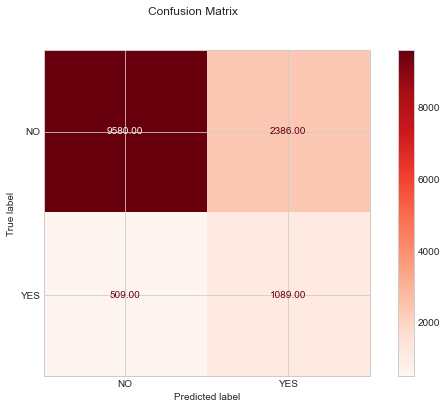

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(modelreg, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

- ### KNeighborsClassifier

```Using KNeighborsClassifier and then the argument inside determines how many nearest neighbors you want your datapoint to look at. There is no rule of thumb for how many neighbors you should look at.```

In [60]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train_os, y_train_os)
y_predicted_KNN = KNN_model.predict(x_test)
y_predicted_KNN 

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [38]:
KNN_model.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_KNN))
print("Precision:",metrics.precision_score(y_test,y_predicted_KNN))
print("Recall:",metrics.recall_score(y_test, y_predicted_KNN))

Accuracy: 0.7994691831318195
Precision: 0.3296903460837887
Recall: 0.6795994993742178


In [39]:
cm=confusion_matrix(y_test,y_predicted_KNN)
cm

array([[9758, 2208],
       [ 512, 1086]], dtype=int64)

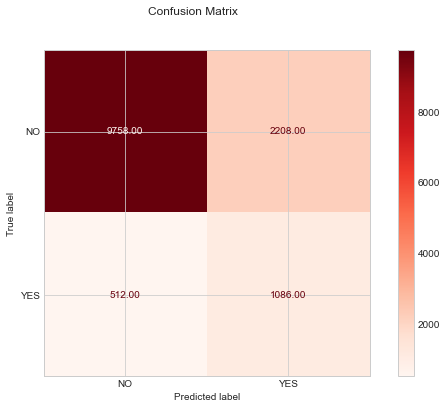

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(KNN_model, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

- ### Naive Bayes

```Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast 
machine learning models that can make quick predictions.```

In [35]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model= GaussianNB()
naive_bayes_model.fit(x_train_os, y_train_os)
y_predicted_naive = naive_bayes_model.predict(x_test)
y_predicted_naive

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [57]:
naive_bayes_model.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_naive))
print("Precision:",metrics.precision_score(y_test,y_predicted_naive))
print("Recall:",metrics.recall_score(y_test, y_predicted_naive))

Accuracy: 0.7625331760542613
Precision: 0.2859399684044234
Recall: 0.6808777429467084


In [58]:
cm=confusion_matrix(y_test,y_predicted_naive)
cm

array([[9257, 2712],
       [ 509, 1086]], dtype=int64)

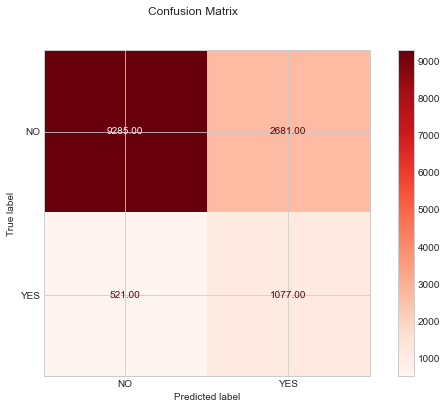

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(naive_bayes_model, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

- ### RandomForest

```A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.```

In [97]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model= RandomForestClassifier(n_estimators = 10)
randomforest_model.fit(x_train_os, y_train_os)
y_predicted_randomforest = randomforest_model.predict(x_test)
y_predicted_randomforest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
randomforest_model.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_randomforest))
print("Precision:",metrics.precision_score(y_test,y_predicted_randomforest))
print("Recall:",metrics.recall_score(y_test, y_predicted_randomforest))

Accuracy: 0.8667797109997051
Precision: 0.4355336212214682
Recall: 0.44180225281602004


In [99]:
cm=confusion_matrix(y_test,y_predicted_randomforest)
cm

array([[11051,   915],
       [  892,   706]], dtype=int64)

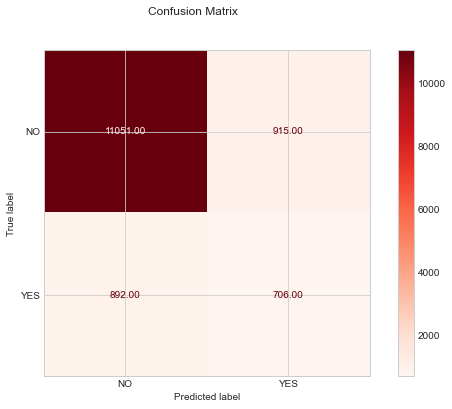

In [100]:
from sklearn.metrics import plot_confusion_matrix
plot_3 = plot_confusion_matrix(randomforest_model, x_test, y_test, display_labels =["NO","YES"], cmap = plt.cm.Reds, values_format = '.2f')
plot_3.figure_.suptitle("Confusion Matrix")
plt.show()

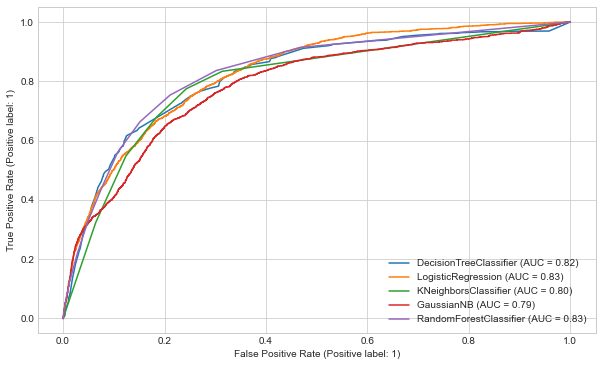

In [101]:
# ROC plot
from sklearn.metrics import plot_roc_curve
classifiers = [deseciontree_model, modelreg, KNN_model, naive_bayes_model,randomforest_model]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test , y_test, ax=ax)

In [102]:
roc_auc_score(y_test,y_predicted_randomforest)
fpr,tpr,threshold =roc_curve(y_test,y_predicted_randomforest)

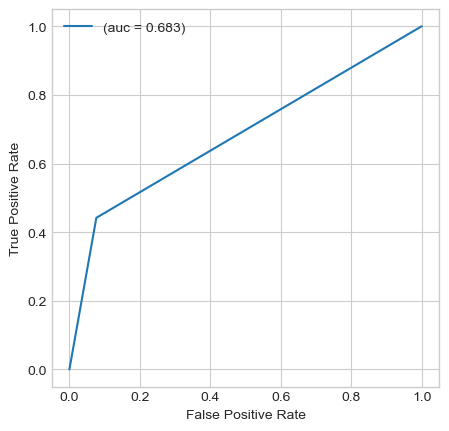

In [103]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
auc = auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Final Analysis

In [84]:
dfnew = pd.DataFrame()
dfnew['Model'] = ['DescisionTree','LogisticRegression','KNeighborsClassifier','GaussianNB','RandomForestClassifier']
dfnew['Accuracy'] = [0.8276319669713949,0.7864936596874078,0.79991153052197,0.7748451784134474,0.8692126216455323]
dfnew['Precision']=[0.3218650973291082,0.3043351760256037,0.3203583565029348,0.2909596662030598,0.43303303303303303]
dfnew['Recall']=[0.4584139264990329,0.6744036105738234,0.6686009026434558,0.6744036105738234,0.46486137975499675]
dfnew

,Model,Accuracy,Precision,Recall
0,DescisionTree,0.827632,0.321865,0.458414
1,LogisticRegression,0.786494,0.304335,0.674404
2,KNeighborsClassifier,0.799912,0.320358,0.668601
3,GaussianNB,0.774845,0.290960,0.674404
4,RandomForestClassifier,0.869213,0.433033,0.464861


In [85]:
cm = sns.light_palette('seagreen',as_cmap=True)
s = dfnew.style.background_gradient(cmap=cm)
s

,Model,Accuracy,Precision,Recall
0,DescisionTree,0.827632,0.321865,0.458414
1,LogisticRegression,0.786494,0.304335,0.674404
2,KNeighborsClassifier,0.799912,0.320358,0.668601
3,GaussianNB,0.774845,0.290960,0.674404
4,RandomForestClassifier,0.869213,0.433033,0.464861


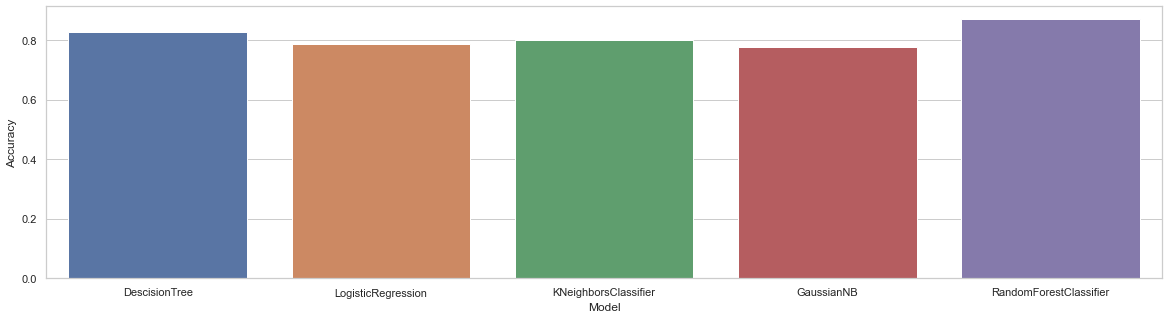

In [86]:
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.barplot(y ='Accuracy',x = 'Model',data = dfnew)

> __Here , we can clearly see that RandomForestClassifier has a better accuracy when compared to other algorithms.__

## PCA and Clustering

- __Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning.__

- __Clustering is an unsupervised machine learning method of identifying and grouping similar data points in larger datasets without concern__ 

    __for the specific outcome.__

In [87]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(x_test,y_test)
y_predicted

array([1, 0, 0, ..., 0, 1, 0])

In [88]:
x_test['cluster']=y_predicted
x_test

,age,balance,day,duration,campaign,pdays,previous,cluster
3610,0.311688,0.095673,0.466667,0.053274,0.048387,0.000000,0.000000,1
11677,0.246753,0.092859,0.633333,0.033957,0.016129,0.000000,0.000000,0
33018,0.181818,0.081183,0.533333,0.166531,0.048387,0.000000,0.000000,0
44323,0.454545,0.075582,0.900000,0.078894,0.032258,0.208716,0.003636,0
8119,0.181818,0.075137,0.033333,0.037210,0.064516,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...
10811,0.272727,0.089971,0.533333,0.029890,0.000000,0.000000,0.000000,0
28752,0.376623,0.095501,0.966667,0.048800,0.000000,0.000000,0.000000,0
22657,0.168831,0.072803,0.800000,0.038837,0.064516,0.000000,0.000000,0
12529,0.415584,0.072849,0.066667,0.004880,0.000000,0.000000,0.000000,1


In [89]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = df2
pca = PCA(2)
 
#Transform the data
df3 = pca.fit_transform(data)
 
df3.shape

(45211, 2)

~~~
The K-means clustering algorithm computes centroids and repeats until the optimal centroid is found.
~~~

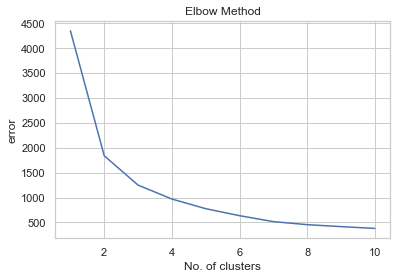

In [90]:
error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(df3)
    kmeans.fit(df3)
    error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title("Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("error")
plt.show()

~~~
WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. 
WCSS value is largest when K = 1.
~~~

> __Here , _K = 2_ as the number of clusters increases from 2 and the WCSS starts to decrease.__

In [91]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters=2, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(df3)
#
# Calculate Silhoutte Score
#
score = silhouette_score(df3, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.473


~~~
The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1.
Values near 0 denote overlapping clusters.
~~~

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df3)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df3, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

> __Here , the Silhouette score is maximum at 2 hence we take K = 2.__

In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df3)
 
print(label)

In [ ]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df3[label == i , 0] , df3[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df3[label == i , 0] , df3[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()


~~~
The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.
~~~

## Conclusion 

__The dataset contained 16 features and 1 target variable for binary classification which determines if client will subscribe deposit or not.__

__With the given bank data, we implemented Exploratory Data Analysis, Visualized the data, Machine Learning models__

__and evaluated the model. After pre-processsing the data, then applied various classification algorithms on the data__

__which made it clear that Random Forest Classifier Model performed excellent with high accuracy (87%) compared to other algorithms.__